# Классификация текста

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

Мы будем решать задачу предсказания оценки, проставленной вину, базируясь на отзыве. Данные взяты из конкурса https://www.kaggle.com/zynicide/wine-reviews

In [73]:
data = pd.read_csv('winemag.csv', index_col=0, na_filter=False)
data.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,,Sicily & Sardinia,Etna,,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,,,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,,Alexander Peartree,,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


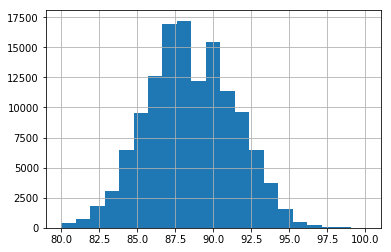

In [74]:
data['points'].hist(bins=21)

Бинаризуем таргет: будем предсказывать, превысит ли оценка 90.

In [75]:
len(data)

129971

In [4]:
data['>=90'] = data['points'] >= 90

data.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,>=90
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,,Sicily & Sardinia,Etna,,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,False
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,,,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,False
2,US,"Tart and snappy, the flavors of lime flesh and...",,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,False
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,,Alexander Peartree,,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,False
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,False


Из всего многообразия признаков нас будет интересовать **description** -- признак содержащий описание вина и **points** -- присужденный балл

#### Задание 1
Выделите из данных X и y

In [5]:
X = ###
y = ###

## Извлечение признаков из текстов

Перед тем как работать с текстом, его необходимо токенизировать - разбить на отдельные токены. В качестве токенов могут выступать слова, фразы, предложений и т.п. Токенизировать текст можно  помощью регулярных выражений или готовых токенизаторов. 

После токенизации нужно привести текст к нормальной форме. Речь идет о [стемминге и/или лемматизации](https://nlp.stanford.edu/IR-book/html/htmledition/stemming-and-lemmatization-1.html) - это схожие процессы, используемые для обработки словоформ.

Для работы лемматизации английского текста можно воспользоваться библиотекой nltk:

In [6]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /home/ibr/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/ibr/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

#### Задание 2
Токенизируйте тексты. Сейчас Х - это набор из строк-текстов. Разбейте каждый текст на слова (токенизируйте его), каждое из которых написано в нижнем регистре.

(Вам могут понадобиться функция word_tokenize из nltk.tokenize, а также методы строк isalpha и lower)

In [144]:
from nltk.tokenize import word_tokenize

word_tokenize('Hello, it\'s me Vasya1')

['Hello', ',', 'it', "'s", 'me', 'Vasya1']

In [145]:
a = [1,2,4]
[item ** 2 for item in a]

[1, 4, 16]

In [146]:
'Masha'.lower()

'masha'

In [147]:
'Masha123'.isalpha(), 'Vasya'.isalpha()

(False, True)

In [7]:
from nltk.tokenize import word_tokenize
from tqdm import tqdm_notebook

tokens = ###

In [148]:
tokens[0]

['aromas',
 'include',
 'tropical',
 'fruit',
 'broom',
 'brimstone',
 'and',
 'dried',
 'herb',
 'the',
 'palate',
 'is',
 'overly',
 'expressive',
 'offering',
 'unripened',
 'apple',
 'citrus',
 'and',
 'dried',
 'sage',
 'alongside',
 'brisk',
 'acidity']

#### Задание 3
Теперь, когда для каждого текста у вас есть набор слов, встречающихся в нем, можно переходить к лемматизации.
Лемматизируйте все слова с помощью WordNetLemmatizer и объедините получившиеся слова в одну строку через пробел, запишите результат в X

In [8]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
#lemmatizer.lemmatize(<word>)

X = ###

In [10]:
X[0]

'aroma include tropical fruit broom brimstone and dried herb the palate is overly expressive offering unripened apple citrus and dried sage alongside brisk acidity'

In [11]:
X[:5]

['aroma include tropical fruit broom brimstone and dried herb the palate is overly expressive offering unripened apple citrus and dried sage alongside brisk acidity',
 'this is ripe and fruity a wine that is smooth while still structured firm tannin are filled out with juicy red berry fruit and freshened with acidity it already drinkable although it will certainly be better from',
 'tart and snappy the flavor of lime flesh and rind dominate some green pineapple poke through with crisp acidity underscoring the flavor the wine wa all fermented',
 'pineapple rind lemon pith and orange blossom start off the aroma the palate is a bit more opulent with note of guava and mango giving way to a slightly astringent semidry finish',
 'much like the regular bottling from this come across a rather rough and tannic with rustic earthy herbal characteristic nonetheless if you think of it a a pleasantly unfussy country wine it a good companion to a hearty winter stew']

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [10]:
y_train = y_train.values
y_test = y_test.values

### Bag of Words

Cоздаем вектор длиной в словарь, для каждого слова считаем количество вхождений в текст и подставляем это число на соответствующую позицию в векторе.

Построим модель BOW с помощью [CountVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(X_train)

vocabulary = vectorizer.get_feature_names()
print('Размер словаря: %d' % len(vocabulary))

description_count = vectorizer.transform(X_train)
top_tokens, _ = zip(*sorted(zip(vocabulary, description_count.sum(axis=0).getA1()), 
                            key=lambda x: x[1], reverse=True)[:10])
print('Top-10 слов: %s'%'; '.join(top_tokens))

Размер словаря: 26562
Top-10 слов: and; the; of; with; this; it; is; wine; flavor; in


Видно, что большая часть из топ-10 слов является не информативными - стоп-словами. Что бы они не участвовали в представлении, в конструктор CountVectorizer в качестве параметра можно передать список стоп-слов:

In [12]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/ibr/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
'has' in stopwords.words('english')

True

In [14]:
stop_words = set(stopwords.words('english'))
vectorizer = CountVectorizer(stop_words=stop_words)
vectorizer.fit(X_train)
vocabulary = vectorizer.get_feature_names()
print('Размер словаря: %d' % len(vocabulary))

description_count = vectorizer.transform(X_train)
top_tokens, _ = zip(*sorted(zip(vocabulary, description_count.sum(axis=0).getA1()), 
                            key=lambda x: x[1], reverse=True)[:10])
print('Top-10 слов: %s'%'; '.join(top_tokens))

Размер словаря: 26439
Top-10 слов: wine; flavor; fruit; aroma; finish; palate; acidity; tannin; cherry; drink


In [15]:
top_tokens, _ = zip(*sorted(zip(vocabulary, description_count.sum(axis=0).getA1()), 
                            key=lambda x: x[1], reverse=True)[:20])
top_tokens

('wine',
 'flavor',
 'fruit',
 'aroma',
 'finish',
 'palate',
 'acidity',
 'tannin',
 'cherry',
 'drink',
 'ripe',
 'black',
 'note',
 'ha',
 'spice',
 'red',
 'berry',
 'rich',
 'fresh',
 'nose')

Чтобы сжать векторное представление, можно "отбросить" редкие слова:

In [16]:
vectorizer = CountVectorizer(stop_words=stop_words, min_df=10).fit(X)
vocabulary = vectorizer.get_feature_names()
print('Размер словаря: %d'%len(vocabulary))

X_train_bow = vectorizer.transform(X_train)
X_test_bow = vectorizer.transform(X_test)

Размер словаря: 7669


In [17]:
X_train_bow

<116973x7669 sparse matrix of type '<class 'numpy.int64'>'
	with 2691225 stored elements in Compressed Sparse Row format>

### Naive Bayes

In [18]:
from sklearn.naive_bayes import MultinomialNB

In [19]:
nb_model = MultinomialNB()
nb_model.fit(X_train_bow, y_train)
y_pred = nb_model.predict_proba(X_test_bow)[:, 1]

In [20]:
from sklearn.metrics import roc_auc_score, roc_curve

0.8759507446374887


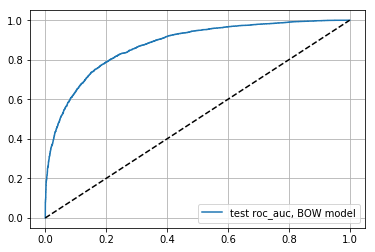

In [21]:
plt.plot(*roc_curve(y_test, y_pred)[:2], label='test roc_auc, BOW model')

plt.plot([0, 1], [0, 1], '--', color='black',)
plt.grid()
plt.legend()

print(roc_auc_score(y_test, y_pred))

In [22]:
def plot_models(names, models, X_train, X_test, y_train, y_test):
    """
    gets lists of names, models, lists of train and test samples, train and test answers
    plots ROC curves
    """
    
    for name, model, X in zip(names, models, X_train):
        proba = model.predict_proba(X)[:, 1]
        auc = roc_auc_score(y_train, proba)
        plt.plot(*roc_curve(y_train, proba)[:2], label='train %s AUC=%.4f' % (name, auc))
    
    for name, model, X in zip(names, models, X_test):
        proba = model.predict_proba(X)[:, 1]
        auc = roc_auc_score(y_test, proba)
        plt.plot(*roc_curve(y_test, proba)[:2], label='test %s AUC=%.4f' % (name, auc))
        
        
    plt.plot([0, 1], [0, 1], '--', color='black',)
    plt.legend(fontsize='large')
    plt.grid()
    plt.show()

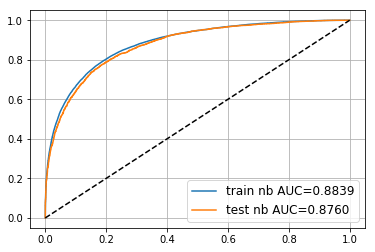

In [23]:
plot_models(['nb'], [nb_model], [X_train_bow], [X_test_bow], y_train, y_test)

### Логистическая регрессия: сравним качество

In [24]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(C=100)
logistic_model.fit(X_train_bow, y_train)
y_pred = logistic_model.predict_proba(X_test_bow)[:, 1]

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [25]:
vocabulary[np.argmax(logistic_model.coef_, )]

'constitutes'

In [26]:
threshold = sorted(logistic_model.coef_[0], reverse=True)[100]

In [27]:
idx = []
for i in range(len(logistic_model.coef_[0])):
    if logistic_model.coef_[0][i] > threshold:
        idx.append(i)
idx = np.array(idx)

In [28]:
np.array(vocabulary)[idx]

array(['addictively', 'angélus', 'annapolis', 'archery', 'ba', 'ballard',
       'barrett', 'betz', 'bin', 'bonny', 'bradley', 'brain',
       'breathtaking', 'brewer', 'buzz', 'casavecchia', 'chaser',
       'combed', 'comparable', 'condrieu', 'confidently', 'conifer',
       'consisting', 'constitutes', 'cornas', 'corralitos', 'coveted',
       'craftsmanship', 'daou', 'december', 'deceptive', 'delectable',
       'disappointed', 'dunham', 'eager', 'editor', 'endlessly',
       'enviable', 'evoked', 'farrell', 'figgins', 'fluidity', 'glorious',
       'groundwork', 'iii', 'immaturity', 'january', 'jesse', 'joey',
       'josh', 'keeper', 'ken', 'leonetti', 'likability', 'lovable',
       'léoville', 'majeure', 'maresh', 'masterpiece', 'mcminnville',
       'meadow', 'merryvale', 'minuscule', 'monopole', 'myrrh', 'navarro',
       'oh', 'pearmain', 'performing', 'prized', 'replanted',
       'resolutely', 'resonance', 'riveting', 'rodgers', 'roederer',
       'seduces', 'sensory', 'se

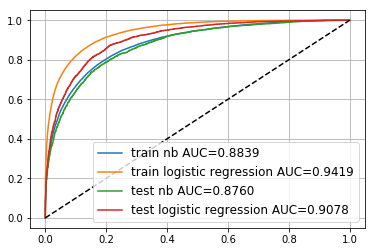

In [29]:
plot_models(['nb', 'logistic regression'], [nb_model, logistic_model], 
            [X_train_bow] * 2, [X_test_bow] * 2, 
            y_train, y_test)

### Добавление tf-idf фичей

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [31]:
tf_idf_vectorizer = TfidfVectorizer(stop_words=stop_words, min_df=10).fit(X)
vocabulary = tf_idf_vectorizer.get_feature_names()
print('Размер словаря: %d'%len(vocabulary))

X_train_tf_idf = tf_idf_vectorizer.transform(X_train)
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)

Размер словаря: 7669


In [32]:
tf_idf_logistic_model = LogisticRegression(C=100)

tf_idf_logistic_model.fit(X_train_tf_idf, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

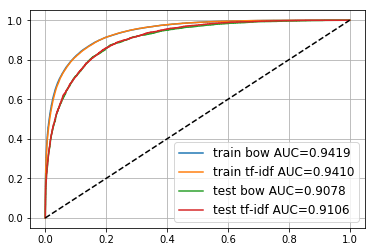

In [33]:
plot_models(['bow', 'tf-idf'], [logistic_model, tf_idf_logistic_model], 
            [X_train_bow, X_train_tf_idf], [X_test_bow, X_test_tf_idf] * 2, 
            y_train, y_test)

### Кодирование предложений эмбеддингами слов

In [34]:
import gensim.downloader 
embeddings = gensim.downloader.load("glove-wiki-gigaword-100")

In [61]:
def vectorize_sum(comment):
    """
    implement a function that converts preprocessed comment to a sum of token vectors
    """
    embedding_dim = embeddings.wv.vectors.shape[1]
    
    comment_vectors = np.stack([embeddings.wv.word_vec(word) if word in embeddings.wv.vocab 
                                else np.zeros(embeddings.wv.vectors.shape[1])
                       for word in comment.split()])
    
    features = np.hstack([np.mean(comment_vectors, axis=0),
                          np.max(comment_vectors, axis=0),
                          np.min(comment_vectors, axis=0),
                          np.std(comment_vectors, axis=0),
                          np.median(comment_vectors, axis=0)])
    return features

In [62]:
X_train_wv = [vectorize_sum(x) for x in tqdm_notebook(X_train)]
X_test_wv = [vectorize_sum(x) for x in tqdm_notebook(X_test)]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  if __name__ == '__main__':


In [63]:
wv_model = LogisticRegression().fit(X_train_wv, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


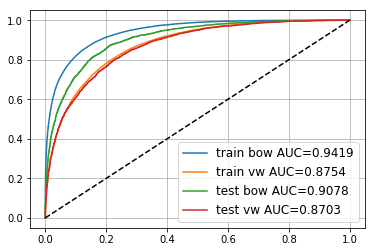

In [64]:
plot_models(['bow', 'vw'], [logistic_model, wv_model], 
            [X_train_bow, X_train_wv], [X_test_bow, X_test_wv], 
            y_train, y_test)

In [56]:
from catboost import CatBoostClassifier

In [72]:
clf = CatBoostClassifier(eval_metric='AUC', learning_rate=0.5, depth=8)
clf.fit(X_train_wv, y_train.astype(int), eval_set=(X_test_wv, y_test.astype(int)))

0:	test: 0.7410239	best: 0.7410239 (0)	total: 383ms	remaining: 6m 22s
1:	test: 0.7815869	best: 0.7815869 (1)	total: 736ms	remaining: 6m 7s
2:	test: 0.7977665	best: 0.7977665 (2)	total: 1.06s	remaining: 5m 52s
3:	test: 0.8102819	best: 0.8102819 (3)	total: 1.36s	remaining: 5m 38s
4:	test: 0.8164420	best: 0.8164420 (4)	total: 1.68s	remaining: 5m 33s
5:	test: 0.8225298	best: 0.8225298 (5)	total: 1.98s	remaining: 5m 27s
6:	test: 0.8273716	best: 0.8273716 (6)	total: 2.31s	remaining: 5m 27s
7:	test: 0.8305341	best: 0.8305341 (7)	total: 2.61s	remaining: 5m 23s
8:	test: 0.8332403	best: 0.8332403 (8)	total: 2.92s	remaining: 5m 21s
9:	test: 0.8375841	best: 0.8375841 (9)	total: 3.22s	remaining: 5m 18s
10:	test: 0.8410157	best: 0.8410157 (10)	total: 3.52s	remaining: 5m 16s
11:	test: 0.8437425	best: 0.8437425 (11)	total: 3.81s	remaining: 5m 13s
12:	test: 0.8462551	best: 0.8462551 (12)	total: 4.11s	remaining: 5m 12s
13:	test: 0.8477575	best: 0.8477575 (13)	total: 4.41s	remaining: 5m 10s
14:	test: 0.8

115:	test: 0.8826151	best: 0.8826151 (115)	total: 37.2s	remaining: 4m 43s
116:	test: 0.8826671	best: 0.8826671 (116)	total: 37.5s	remaining: 4m 42s
117:	test: 0.8826992	best: 0.8826992 (117)	total: 37.8s	remaining: 4m 42s
118:	test: 0.8826597	best: 0.8826992 (117)	total: 38.1s	remaining: 4m 42s
119:	test: 0.8826658	best: 0.8826992 (117)	total: 38.4s	remaining: 4m 41s
120:	test: 0.8825980	best: 0.8826992 (117)	total: 38.7s	remaining: 4m 41s
121:	test: 0.8826542	best: 0.8826992 (117)	total: 39s	remaining: 4m 40s
122:	test: 0.8824857	best: 0.8826992 (117)	total: 39.3s	remaining: 4m 40s
123:	test: 0.8824617	best: 0.8826992 (117)	total: 39.6s	remaining: 4m 39s
124:	test: 0.8824522	best: 0.8826992 (117)	total: 39.9s	remaining: 4m 39s
125:	test: 0.8824866	best: 0.8826992 (117)	total: 40.2s	remaining: 4m 38s
126:	test: 0.8827387	best: 0.8827387 (126)	total: 40.4s	remaining: 4m 37s
127:	test: 0.8828928	best: 0.8828928 (127)	total: 40.7s	remaining: 4m 37s
128:	test: 0.8832454	best: 0.8832454 (12

227:	test: 0.8885471	best: 0.8885471 (227)	total: 1m 12s	remaining: 4m 4s
228:	test: 0.8884461	best: 0.8885471 (227)	total: 1m 12s	remaining: 4m 3s
229:	test: 0.8886009	best: 0.8886009 (229)	total: 1m 12s	remaining: 4m 3s
230:	test: 0.8886185	best: 0.8886185 (230)	total: 1m 13s	remaining: 4m 3s
231:	test: 0.8884688	best: 0.8886185 (230)	total: 1m 13s	remaining: 4m 2s
232:	test: 0.8885556	best: 0.8886185 (230)	total: 1m 13s	remaining: 4m 2s
233:	test: 0.8886980	best: 0.8886980 (233)	total: 1m 13s	remaining: 4m 2s
234:	test: 0.8887095	best: 0.8887095 (234)	total: 1m 14s	remaining: 4m 1s
235:	test: 0.8887764	best: 0.8887764 (235)	total: 1m 14s	remaining: 4m 1s
236:	test: 0.8886295	best: 0.8887764 (235)	total: 1m 14s	remaining: 4m 1s
237:	test: 0.8887547	best: 0.8887764 (235)	total: 1m 15s	remaining: 4m
238:	test: 0.8887812	best: 0.8887812 (238)	total: 1m 15s	remaining: 4m
239:	test: 0.8887461	best: 0.8887812 (238)	total: 1m 15s	remaining: 4m
240:	test: 0.8886329	best: 0.8887812 (238)	tota

337:	test: 0.8911890	best: 0.8916482 (328)	total: 1m 44s	remaining: 3m 25s
338:	test: 0.8911121	best: 0.8916482 (328)	total: 1m 45s	remaining: 3m 24s
339:	test: 0.8911026	best: 0.8916482 (328)	total: 1m 45s	remaining: 3m 24s
340:	test: 0.8911294	best: 0.8916482 (328)	total: 1m 45s	remaining: 3m 24s
341:	test: 0.8910065	best: 0.8916482 (328)	total: 1m 45s	remaining: 3m 23s
342:	test: 0.8909644	best: 0.8916482 (328)	total: 1m 46s	remaining: 3m 23s
343:	test: 0.8909081	best: 0.8916482 (328)	total: 1m 46s	remaining: 3m 23s
344:	test: 0.8910222	best: 0.8916482 (328)	total: 1m 46s	remaining: 3m 23s
345:	test: 0.8910302	best: 0.8916482 (328)	total: 1m 47s	remaining: 3m 23s
346:	test: 0.8910475	best: 0.8916482 (328)	total: 1m 47s	remaining: 3m 23s
347:	test: 0.8911597	best: 0.8916482 (328)	total: 1m 48s	remaining: 3m 23s
348:	test: 0.8911053	best: 0.8916482 (328)	total: 1m 48s	remaining: 3m 22s
349:	test: 0.8911341	best: 0.8916482 (328)	total: 1m 49s	remaining: 3m 22s
350:	test: 0.8911600	best

448:	test: 0.8929197	best: 0.8930301 (440)	total: 2m 20s	remaining: 2m 52s
449:	test: 0.8930767	best: 0.8930767 (449)	total: 2m 20s	remaining: 2m 52s
450:	test: 0.8930757	best: 0.8930767 (449)	total: 2m 21s	remaining: 2m 51s
451:	test: 0.8931173	best: 0.8931173 (451)	total: 2m 21s	remaining: 2m 51s
452:	test: 0.8931667	best: 0.8931667 (452)	total: 2m 21s	remaining: 2m 51s
453:	test: 0.8931242	best: 0.8931667 (452)	total: 2m 22s	remaining: 2m 50s
454:	test: 0.8932153	best: 0.8932153 (454)	total: 2m 22s	remaining: 2m 50s
455:	test: 0.8931878	best: 0.8932153 (454)	total: 2m 22s	remaining: 2m 50s
456:	test: 0.8933080	best: 0.8933080 (456)	total: 2m 22s	remaining: 2m 49s
457:	test: 0.8932949	best: 0.8933080 (456)	total: 2m 23s	remaining: 2m 49s
458:	test: 0.8931794	best: 0.8933080 (456)	total: 2m 23s	remaining: 2m 49s
459:	test: 0.8930904	best: 0.8933080 (456)	total: 2m 23s	remaining: 2m 48s
460:	test: 0.8931443	best: 0.8933080 (456)	total: 2m 24s	remaining: 2m 48s
461:	test: 0.8932316	best

558:	test: 0.8953215	best: 0.8953293 (557)	total: 2m 53s	remaining: 2m 16s
559:	test: 0.8953372	best: 0.8953372 (559)	total: 2m 53s	remaining: 2m 16s
560:	test: 0.8952604	best: 0.8953372 (559)	total: 2m 54s	remaining: 2m 16s
561:	test: 0.8952454	best: 0.8953372 (559)	total: 2m 54s	remaining: 2m 15s
562:	test: 0.8952354	best: 0.8953372 (559)	total: 2m 54s	remaining: 2m 15s
563:	test: 0.8952752	best: 0.8953372 (559)	total: 2m 55s	remaining: 2m 15s
564:	test: 0.8952555	best: 0.8953372 (559)	total: 2m 55s	remaining: 2m 15s
565:	test: 0.8952792	best: 0.8953372 (559)	total: 2m 55s	remaining: 2m 14s
566:	test: 0.8953337	best: 0.8953372 (559)	total: 2m 56s	remaining: 2m 14s
567:	test: 0.8953087	best: 0.8953372 (559)	total: 2m 56s	remaining: 2m 14s
568:	test: 0.8953398	best: 0.8953398 (568)	total: 2m 56s	remaining: 2m 13s
569:	test: 0.8954104	best: 0.8954104 (569)	total: 2m 56s	remaining: 2m 13s
570:	test: 0.8955168	best: 0.8955168 (570)	total: 2m 57s	remaining: 2m 13s
571:	test: 0.8955986	best

669:	test: 0.8971357	best: 0.8971427 (666)	total: 3m 26s	remaining: 1m 41s
670:	test: 0.8970879	best: 0.8971427 (666)	total: 3m 26s	remaining: 1m 41s
671:	test: 0.8970920	best: 0.8971427 (666)	total: 3m 27s	remaining: 1m 41s
672:	test: 0.8971594	best: 0.8971594 (672)	total: 3m 27s	remaining: 1m 40s
673:	test: 0.8971107	best: 0.8971594 (672)	total: 3m 27s	remaining: 1m 40s
674:	test: 0.8971297	best: 0.8971594 (672)	total: 3m 28s	remaining: 1m 40s
675:	test: 0.8971818	best: 0.8971818 (675)	total: 3m 28s	remaining: 1m 39s
676:	test: 0.8971827	best: 0.8971827 (676)	total: 3m 28s	remaining: 1m 39s
677:	test: 0.8972079	best: 0.8972079 (677)	total: 3m 28s	remaining: 1m 39s
678:	test: 0.8972868	best: 0.8972868 (678)	total: 3m 29s	remaining: 1m 38s
679:	test: 0.8972681	best: 0.8972868 (678)	total: 3m 29s	remaining: 1m 38s
680:	test: 0.8972132	best: 0.8972868 (678)	total: 3m 30s	remaining: 1m 38s
681:	test: 0.8972239	best: 0.8972868 (678)	total: 3m 30s	remaining: 1m 38s
682:	test: 0.8971695	best

779:	test: 0.8983427	best: 0.8983454 (778)	total: 4m	remaining: 1m 7s
780:	test: 0.8983372	best: 0.8983454 (778)	total: 4m	remaining: 1m 7s
781:	test: 0.8983421	best: 0.8983454 (778)	total: 4m	remaining: 1m 7s
782:	test: 0.8984586	best: 0.8984586 (782)	total: 4m 1s	remaining: 1m 6s
783:	test: 0.8985880	best: 0.8985880 (783)	total: 4m 1s	remaining: 1m 6s
784:	test: 0.8985834	best: 0.8985880 (783)	total: 4m 1s	remaining: 1m 6s
785:	test: 0.8985366	best: 0.8985880 (783)	total: 4m 2s	remaining: 1m 5s
786:	test: 0.8985784	best: 0.8985880 (783)	total: 4m 2s	remaining: 1m 5s
787:	test: 0.8985530	best: 0.8985880 (783)	total: 4m 2s	remaining: 1m 5s
788:	test: 0.8985164	best: 0.8985880 (783)	total: 4m 3s	remaining: 1m 5s
789:	test: 0.8985382	best: 0.8985880 (783)	total: 4m 3s	remaining: 1m 4s
790:	test: 0.8986548	best: 0.8986548 (790)	total: 4m 3s	remaining: 1m 4s
791:	test: 0.8987048	best: 0.8987048 (791)	total: 4m 4s	remaining: 1m 4s
792:	test: 0.8987512	best: 0.8987512 (792)	total: 4m 4s	rema

891:	test: 0.9002883	best: 0.9003019 (890)	total: 4m 35s	remaining: 33.4s
892:	test: 0.9001780	best: 0.9003019 (890)	total: 4m 36s	remaining: 33.1s
893:	test: 0.9001556	best: 0.9003019 (890)	total: 4m 36s	remaining: 32.8s
894:	test: 0.9001796	best: 0.9003019 (890)	total: 4m 36s	remaining: 32.4s
895:	test: 0.9002019	best: 0.9003019 (890)	total: 4m 36s	remaining: 32.1s
896:	test: 0.9002410	best: 0.9003019 (890)	total: 4m 37s	remaining: 31.8s
897:	test: 0.9002703	best: 0.9003019 (890)	total: 4m 37s	remaining: 31.5s
898:	test: 0.9002252	best: 0.9003019 (890)	total: 4m 37s	remaining: 31.2s
899:	test: 0.9002386	best: 0.9003019 (890)	total: 4m 38s	remaining: 30.9s
900:	test: 0.9002102	best: 0.9003019 (890)	total: 4m 38s	remaining: 30.6s
901:	test: 0.9002174	best: 0.9003019 (890)	total: 4m 38s	remaining: 30.3s
902:	test: 0.9002281	best: 0.9003019 (890)	total: 4m 38s	remaining: 30s
903:	test: 0.9002908	best: 0.9003019 (890)	total: 4m 39s	remaining: 29.6s
904:	test: 0.9003117	best: 0.9003117 (90